En toda esta sección se entrenarán redes neuronales de 1 sola capa oculta entrenando
con gradiente descendente clásico. Se buscará apreciar las bondades de una red como
aproximador universal (no nos importa por ahora la capacidad de generalización).



###Clasificación

1. Generar una base de datos de una XOR con todas las posibles combinaciones de
±1 (4 casos). Asignar los labels correspondientes (1 si ambas entradas son iguales,
0 si son diferentes).

In [56]:
import pandas as pd

# Pongo -1 en vez de 0 para que la RELU pueda trabajar bien
datos = [[-1, -1, 0],
          [-1, 1, 1],
          [1, -1, 1],
         [1,1,0]]

columnas = ['Bit 1', 'Bit 2', 'Output'] 

df = pd.DataFrame(datos, columns=columnas)
df.head()

training_data = df.loc[:,['Bit 1','Bit 2']]
target_data = df.loc[:,'Output']

(4, 2)


2. Entrenar una red neuronal con activación ReLU que alcance 100 % de accuracy. ¿Cuál es la mínima dimensión de la unidad oculta para lograr esto?

In [89]:
import numpy as np
from keras.models import Sequential
from keras.layers.core import Dense
import tensorflow as tf

# Creo la arquitectura de la red neuronal
model = Sequential()                                          # Secuencial -> creo una serie de capas de neuronas secuenciales, una delante de otra.
model.add(Dense(8, input_dim=2, activation='relu'))          # input_dim = 2 (defino la capa de entrada con 2 neuronas, BIT0 y BIT1 de XOR)
model.add(Dense(1))                                           # La dimensión de la capa oculta es el primer parámetro
                                                              # Por último agregamos una capa de salida (en este caso sin funcion de activacion xq estamos en clasificacion)

model.summary()

Model: "sequential_31"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_60 (Dense)            (None, 8)                 24        
                                                                 
 dense_61 (Dense)            (None, 1)                 9         
                                                                 
Total params: 33
Trainable params: 33
Non-trainable params: 0
_________________________________________________________________


In [91]:
es = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=1)
model.compile(optimizer=tf.keras.optimizers.SGD(learning_rate=10), loss = tf.keras.losses.BinaryCrossentropy(from_logits=True), metrics=["accuracy"])
model.fit(training_data, target_data, epochs=100)


Epoch 1/100
1/1 [==============================] - 1s 871ms/step - loss: 0.0041 - accuracy: 1.0000
Epoch 2/100
1/1 [==============================] - 0s 10ms/step - loss: 0.0037 - accuracy: 1.0000
Epoch 3/100
1/1 [==============================] - 0s 12ms/step - loss: 0.0032 - accuracy: 1.0000
Epoch 4/100
1/1 [==============================] - 0s 7ms/step - loss: 0.0028 - accuracy: 1.0000
Epoch 5/100
1/1 [==============================] - 0s 7ms/step - loss: 0.0025 - accuracy: 1.0000
Epoch 6/100
1/1 [==============================] - 0s 7ms/step - loss: 0.0023 - accuracy: 1.0000
Epoch 7/100
1/1 [==============================] - 0s 8ms/step - loss: 0.0021 - accuracy: 1.0000
Epoch 8/100
1/1 [==============================] - 0s 8ms/step - loss: 0.0019 - accuracy: 1.0000
Epoch 9/100
1/1 [==============================] - 0s 11ms/step - loss: 0.0018 - accuracy: 1.0000
Epoch 10/100
1/1 [==============================] - 0s 9ms/step - loss: 0.0016 - accuracy: 1.0000
Epoch 11/100
1/1 [======

La mínima dimensión de la unidad oculta para lograr esto es de 8 (fui probando)

###3. Repetir con activación sigmoide. Extraer conclusiones.

In [84]:
# Creo la arquitectura de la red neuronal
model = Sequential()                                          
model.add(Dense(2, input_dim=2, activation='sigmoid'))         
model.add(Dense(1))                     
model.summary()

Model: "sequential_29"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_56 (Dense)            (None, 2)                 6         
                                                                 
 dense_57 (Dense)            (None, 1)                 3         
                                                                 
Total params: 9
Trainable params: 9
Non-trainable params: 0
_________________________________________________________________


In [96]:
es = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=1)
model.compile(optimizer=tf.keras.optimizers.SGD(learning_rate=1), loss = tf.keras.losses.BinaryCrossentropy(from_logits=True), metrics=["accuracy"])
model.fit(training_data, target_data, epochs=100)

Epoch 1/100
1/1 [==============================] - 0s 358ms/step - loss: 5.3450e-05 - accuracy: 1.0000
Epoch 2/100
1/1 [==============================] - 0s 8ms/step - loss: 5.3424e-05 - accuracy: 1.0000
Epoch 3/100
1/1 [==============================] - 0s 6ms/step - loss: 5.3402e-05 - accuracy: 1.0000
Epoch 4/100
1/1 [==============================] - 0s 6ms/step - loss: 5.3383e-05 - accuracy: 1.0000
Epoch 5/100
1/1 [==============================] - 0s 5ms/step - loss: 5.3362e-05 - accuracy: 1.0000
Epoch 6/100
1/1 [==============================] - 0s 5ms/step - loss: 5.3342e-05 - accuracy: 1.0000
Epoch 7/100
1/1 [==============================] - 0s 6ms/step - loss: 5.3325e-05 - accuracy: 1.0000
Epoch 8/100
1/1 [==============================] - 0s 6ms/step - loss: 5.3305e-05 - accuracy: 1.0000
Epoch 9/100
1/1 [==============================] - 0s 6ms/step - loss: 5.3285e-05 - accuracy: 1.0000
Epoch 10/100
1/1 [==============================] - 0s 6ms/step - loss: 5.3266e-05 - accu

Se puede ver que ahora la mínima dimensión de la unidad oculta para lograr esto es de 2, usando 1 en learning rate

###Regresión

Generar una base de datos de la función f(x, y, z) = sin(x) + cos(y) + z. Para ello
barra una grilla de 20 puntos para cada coordenada (0 ≤ x < 2π, 0 ≤ y < 2π y
0 ≤ z ≤ 1) y arme una base de datos con las 8000 combinaciones posibles.

In [113]:
import math
import itertools as it
import numpy as np

def f(x, y, z):
  return math.sin(x) + math.cos(x) + z

x_step = (2 * math.pi) / 20
y_step = (2 * math.pi) / 20
z_step = 1 / 20

x_points, y_points, z_points = [], [], []
for i in range(20): x_points.append(x_step * i)
for i in range(20): y_points.append(y_step * i)
for i in range(20): z_points.append(z_step * i)

combinations = it.product(x_points, y_points)
combinations = it.product(combinations, z_points)
training_data = np.array([[x, y, z] for (x, y), z in combinations]) # Si quiero convertir un iterador a lista usar list(iterator)
target_data = np.array([f(x, y, z) for x, y, z in training_data])

Entrenar una red neuronal con activación ReLU e indique el error cuadrático medio. Grafique f(x, x, x) y comparela con la salida del regresor barriendo x.

In [141]:
model = Sequential()                                          
model.add(Dense(64, input_dim=3, activation='relu'))         
model.add(Dense(1))  

es = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=1)
model.compile(optimizer=tf.keras.optimizers.SGD(learning_rate=0.01), loss = 'MeanSquaredError', metrics=["accuracy"])
model.fit(training_data, target_data, epochs=100)

Epoch 1/100
250/250 [==============================] - 1s 1ms/step - loss: 0.6949 - accuracy: 0.0033
Epoch 2/100
250/250 [==============================] - 0s 1ms/step - loss: 0.5475 - accuracy: 0.0035
Epoch 3/100
250/250 [==============================] - 0s 1ms/step - loss: 0.5080 - accuracy: 0.0034
Epoch 4/100
250/250 [==============================] - 0s 1ms/step - loss: 0.4641 - accuracy: 0.0036
Epoch 5/100
250/250 [==============================] - 0s 1ms/step - loss: 0.4002 - accuracy: 0.0035
Epoch 6/100
250/250 [==============================] - 0s 1ms/step - loss: 0.3476 - accuracy: 0.0036
Epoch 7/100
250/250 [==============================] - 0s 1ms/step - loss: 0.2855 - accuracy: 0.0034
Epoch 8/100
250/250 [==============================] - 0s 1ms/step - loss: 0.2275 - accuracy: 0.0039
Epoch 9/100
250/250 [==============================] - 0s 1ms/step - loss: 0.1877 - accuracy: 0.0039
Epoch 10/100
250/250 [==============================] - 0s 1ms/step - loss: 0.1493 - accura

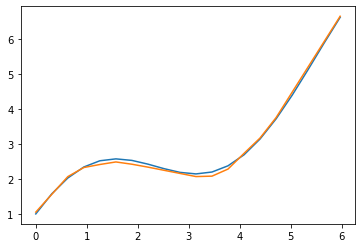

In [142]:
from matplotlib import pyplot

x_train = np.array([(x, x, x) for x in x_points])
prediccion = model.predict(x=x_train)

pyplot.plot(x_points, np.array([f(x, x, x) for x in x_points]))
pyplot.plot(x_points, prediccion)

pyplot.show()

Repetir con activación sigmoide. Extraer conclusiones.

In [147]:
model = Sequential()                                          
model.add(Dense(64, input_dim=3, activation='sigmoid'))         
model.add(Dense(1))  

es = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=1)
model.compile(optimizer=tf.keras.optimizers.SGD(learning_rate=0.1), loss = 'MeanSquaredError', metrics=["accuracy"])
model.fit(training_data, target_data, epochs=100)

Epoch 1/100
250/250 [==============================] - 1s 1ms/step - loss: 1.3006 - accuracy: 0.0049
Epoch 2/100
250/250 [==============================] - 0s 1ms/step - loss: 0.4513 - accuracy: 0.0050
Epoch 3/100
250/250 [==============================] - 0s 1ms/step - loss: 0.4142 - accuracy: 0.0047
Epoch 4/100
250/250 [==============================] - 0s 1ms/step - loss: 0.3755 - accuracy: 0.0041
Epoch 5/100
250/250 [==============================] - 0s 1ms/step - loss: 0.3258 - accuracy: 0.0039
Epoch 6/100
250/250 [==============================] - 0s 1ms/step - loss: 0.2605 - accuracy: 0.0039
Epoch 7/100
250/250 [==============================] - 0s 1ms/step - loss: 0.2186 - accuracy: 0.0041
Epoch 8/100
250/250 [==============================] - 0s 1ms/step - loss: 0.1859 - accuracy: 0.0044
Epoch 9/100
250/250 [==============================] - 0s 1ms/step - loss: 0.1612 - accuracy: 0.0047
Epoch 10/100
250/250 [==============================] - 0s 1ms/step - loss: 0.1475 - accura

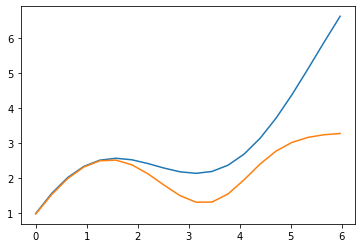

In [148]:
from matplotlib import pyplot

x_train = np.array([(x, x, x) for x in x_points])
prediccion = model.predict(x=x_train)

pyplot.plot(x_points, np.array([f(x, x, x) for x in x_points]))
pyplot.plot(x_points, prediccion)

pyplot.show()